In [1]:
import pandas as pd


In [15]:
df = pd.read_csv("telecom_churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [17]:
column_labels = df.columns


In [18]:
print(column_labels)


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [21]:
print(df.shape)


(3333, 20)


In [22]:
total_day_calls_by_state_area = df.groupby(['State', 'Area code'])['Total day calls'].sum()



In [23]:
print(total_day_calls_by_state_area)


State  Area code
AK     408          1342
       415          2357
       510          1255
AL     408          2524
       415          4090
                    ... 
WV     415          5474
       510          3491
WY     408          1659
       415          4205
       510          2007
Name: Total day calls, Length: 153, dtype: int64


In [24]:
grouped = df.groupby(['State', 'Area code'])


In [12]:
telecom_agg = grouped.agg({'Total day calls': 'sum'})


In [13]:
telecom_agg.reset_index(inplace=True)


In [14]:
print(telecom_agg.head(10))


  State  Area code  Total day calls
0    AK        408             1342
1    AK        415             2357
2    AK        510             1255
3    AL        408             2524
4    AL        415             4090
5    AL        510             1314
6    AR        408             1382
7    AR        415             2756
8    AR        510             1480
9    AZ        408             1452


In [25]:
# Count the number of churned users
churned_users = df['Churn'].sum()

# Calculate the total number of users
total_users = df.shape[0]

# Calculate the churn rate
churn_rate = churned_users / total_users

print("Churn rate:", churn_rate)


Churn rate: 0.14491449144914492


In [26]:
# Change "Churn" column type to an integer
df['Churn'] = df['Churn'].astype(int)


In [27]:
# Count the number of churned users
churned_users = df['Churn'].sum()

# Calculate the total number of customers
total_customers = df.shape[0]

# Calculate the churn rate
churn_rate = churned_users / total_customers

print("Churn rate:", churn_rate)


Churn rate: 0.14491449144914492


In [28]:
# Filter the DataFrame to include only churned users
churned_users_df = df[df['Churn'] == 1]

# Calculate the average time spent on the phone during daytime for churned users
average_daytime_minutes_churned = churned_users_df['Total day minutes'].mean()

print("Average time spent on the phone during daytime for churned users:", average_daytime_minutes_churned, "minutes")


Average time spent on the phone during daytime for churned users: 206.91407867494823 minutes


In [29]:
# Filter the DataFrame to include only loyal users who do not have an international plan
loyal_users_no_intl_plan_df = df[(df['Churn'] == 0) & (df['International plan'] == 'No')]

# Find the maximum length of international calls for these users
max_intl_calls_length = loyal_users_no_intl_plan_df['Total intl minutes'].max()

print("Maximum length of international calls among loyal users who do not have an international plan:", max_intl_calls_length, "minutes")


Maximum length of international calls among loyal users who do not have an international plan: 18.9 minutes


In [30]:
# Filter the DataFrame to include only subscribers and non-subscribers of international plans
intl_subscribers_df = df[df['International plan'] == 'Yes']
intl_non_subscribers_df = df[df['International plan'] == 'No']

# Sort the DataFrames by the number of international calls in descending order
intl_subscribers_sorted = intl_subscribers_df.sort_values(by='Total intl calls', ascending=False)
intl_non_subscribers_sorted = intl_non_subscribers_df.sort_values(by='Total intl calls', ascending=False)

# Select the top 3 subscribers and non-subscribers with the most international calls
top_3_intl_subscribers = intl_subscribers_sorted.head(3)
top_3_intl_non_subscribers = intl_non_subscribers_sorted.head(3)

print("Top 3 international plan subscribers with the most intl calls:")
print(top_3_intl_subscribers)

print("\nTop 3 non-subscribers of international plans with the most intl calls:")
print(top_3_intl_non_subscribers)


Top 3 international plan subscribers with the most intl calls:
     State  Account length  Area code International plan Voice mail plan  \
3291    MI             119        510                Yes             Yes   
41      MD             135        408                Yes             Yes   
957     NV             144        415                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
3291                     22              172.1              119   
41                       41              173.1               85   
957                       0              150.0               69   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3291             29.26              223.6              133             19.01   
41               29.43              203.9              107             17.33   
957              25.50              285.9               73             24.30   

      Total night minutes  Total night cal

In [31]:
def top(df, n, column):
    """
    Sort the values in the specified column of the DataFrame and return the top n rows.
    
    Parameters:
        df (DataFrame): The pandas DataFrame.
        n (int): The number of top rows to return.
        column (str): The column to sort by.
    
    Returns:
        DataFrame: The top n rows sorted by the specified column.
    """
    # Sort the DataFrame by the specified column in descending order
    sorted_df = df.sort_values(by=column, ascending=False)
    
    # Select the top n rows
    top_n_rows = sorted_df.head(n)
    
    return top_n_rows


In [32]:
# Get the top 3 rows based on the 'Total intl calls' column
top_3_rows = top(df, n=3, column='Total intl calls')
print(top_3_rows)


     State  Account length  Area code International plan Voice mail plan  \
3291    MI             119        510                Yes             Yes   
22      AZ             130        415                 No              No   
982     ND              84        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3291                     22              172.1              119   
22                        0              183.0              112   
982                      33              159.1              106   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3291             29.26              223.6              133             19.01   
22               31.11               72.9               99              6.20   
982              27.05              149.8              101             12.73   

      Total night minutes  Total night calls  Total night charge  \
3291                150.0            

In [33]:
# Define the top function
def top(df, n, column):
    """
    Sort the values in the specified column of the DataFrame and return the top n rows.
    
    Parameters:
        df (DataFrame): The pandas DataFrame.
        n (int): The number of top rows to return.
        column (str): The column to sort by.
    
    Returns:
        DataFrame: The top n rows sorted by the specified column.
    """
    sorted_df = df.sort_values(by=column, ascending=False)
    return sorted_df.head(n)

# Group the DataFrame by 'International plan' and apply the top function
top_by_intl_plan = df.groupby('International plan').apply(top, n=3, column='Total intl calls')

print(top_by_intl_plan)


                        State  Account length  Area code International plan  \
International plan                                                            
No                 22      AZ             130        415                 No   
                   377     ND              79        408                 No   
                   982     ND              84        415                 No   
Yes                3291    MI             119        510                Yes   
                   41      MD             135        408                Yes   
                   957     NV             144        415                Yes   

                        Voice mail plan  Number vmail messages  \
International plan                                               
No                 22                No                      0   
                   377               No                      0   
                   982              Yes                     33   
Yes                3291             Y

In [34]:
# Build a contingency table using crosstab method with normalization
contingency_table_normalized = pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

print(contingency_table_normalized)


Voice mail plan        No       Yes
Churn                              
0                0.602460  0.252625
1                0.120912  0.024002


In [35]:
# Define the list of charge columns
charge_columns = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

# Add a new column 'total_charge' to the DataFrame by summing all the charge columns
df['total_charge'] = df[charge_columns].sum(axis=1)

# Display the DataFrame to verify the addition of the 'total_charge' column
print(df)



     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

In [37]:
# Add a new column 'Day_charge_pct' to the DataFrame by dividing 'Total day charge' by 'total_charge'
df['Day_charge_pct'] = (df['Total day charge'] / df['total_charge']) * 100

# Display the DataFrame to verify the addition of the 'Day_charge_pct' column
print(df)


     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

In [48]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import matplotlib.pyplot as plt


In [50]:
my_color = ['red', 'green', 'orange', 'blue', 'yellow']


In [51]:
# Select the first 5 rows of the DataFrame
first_5_rows = df.iloc[:5]

# Print the selected rows
print(first_5_rows)


  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total night minutes  \
0             45.07              197.4  ...                244.7   
1             27.47              195.5  

In [53]:
# Select the first 5 rows of the DataFrame
first_5_rows = df.iloc[:5]

# Print the selected rows
print(first_5_rows)


  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total night minutes  \
0             45.07              197.4  ...                244.7   
1             27.47              195.5  

Text(0, 0.5, 'Day Charge %')

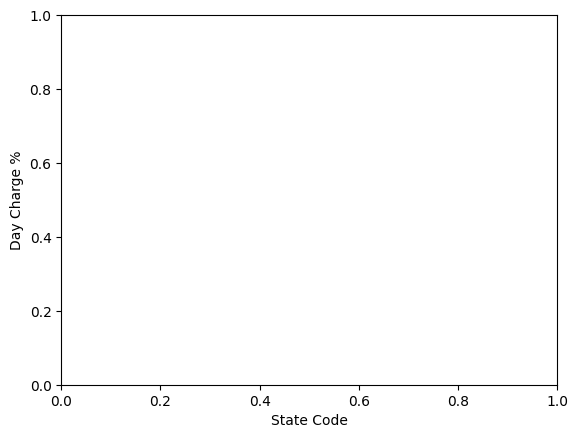

In [54]:
# Set the xlabel and ylabel for the plot
plt.xlabel("State Code")
plt.ylabel("Day Charge %")
